In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
df = pd.read_csv('data/concrete_strength.csv',index_col=0) 

In [34]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1030 non-null   int64  
 1   cement                         1030 non-null   float64
 2   blast_furnace_slag             1030 non-null   float64
 3   fly_ash                        1030 non-null   float64
 4   water                          1030 non-null   float64
 5   superplasticizer               1030 non-null   float64
 6   coarse_aggregate               1030 non-null   float64
 7   fine_aggregate                 1030 non-null   float64
 8   age                            1030 non-null   int64  
 9   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 80.6 KB


In [32]:
df.drop('Unnamed: 0',axis = 1,inplace=True)

In [28]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [29]:
df.to_csv("concrete_strength.csv")

In [26]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

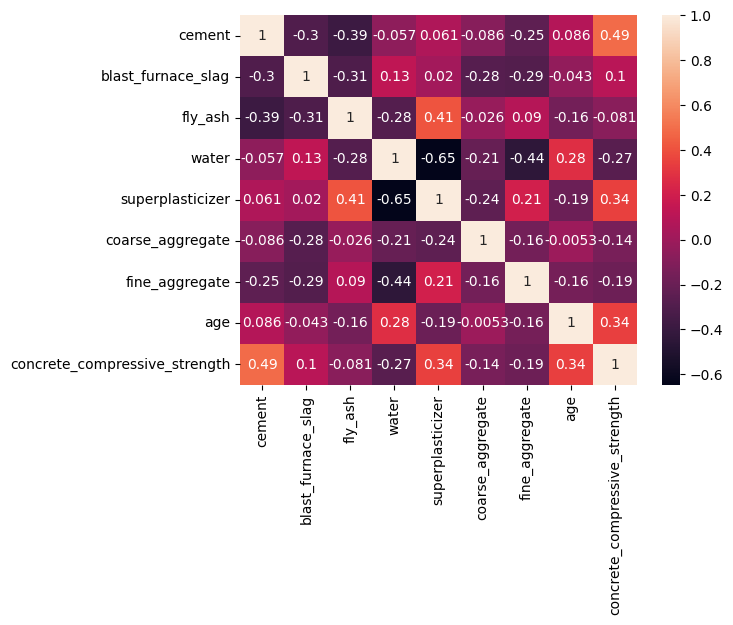

In [12]:
sns.heatmap(df.corr(),annot=True)

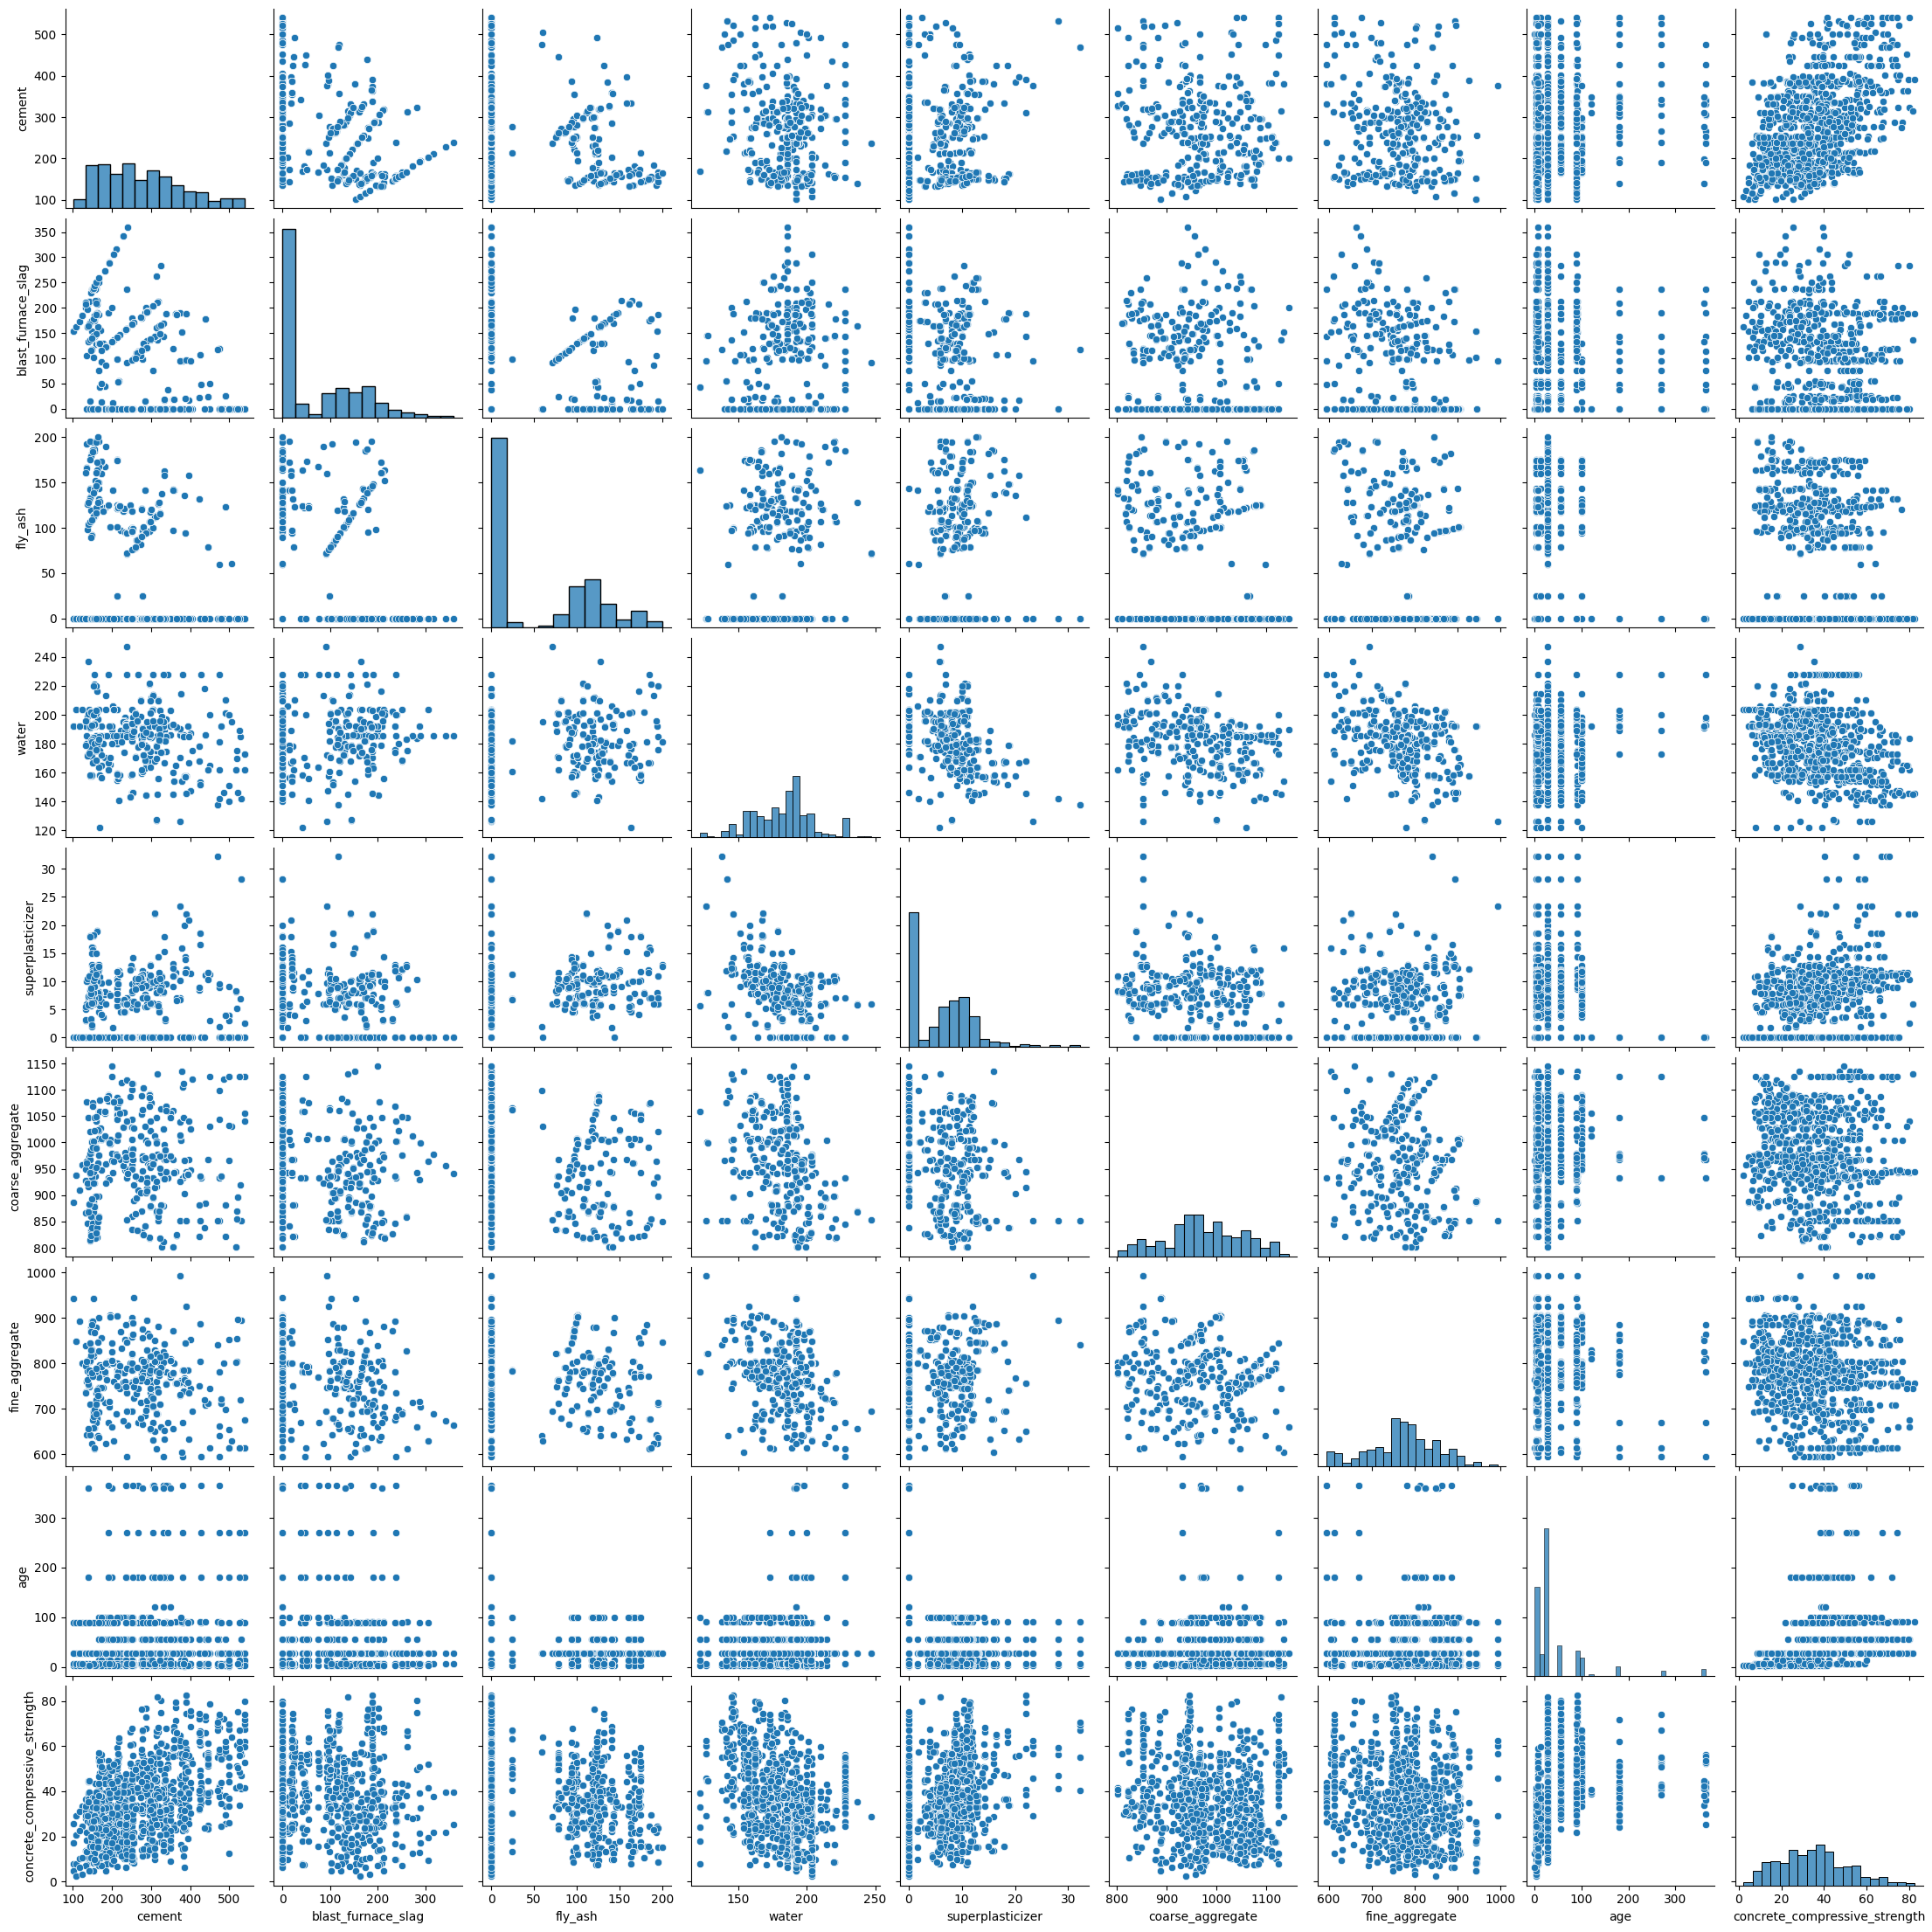

In [13]:
sns.pairplot(df)

In [14]:
df.columns[:-1]

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age'],
      dtype='object')

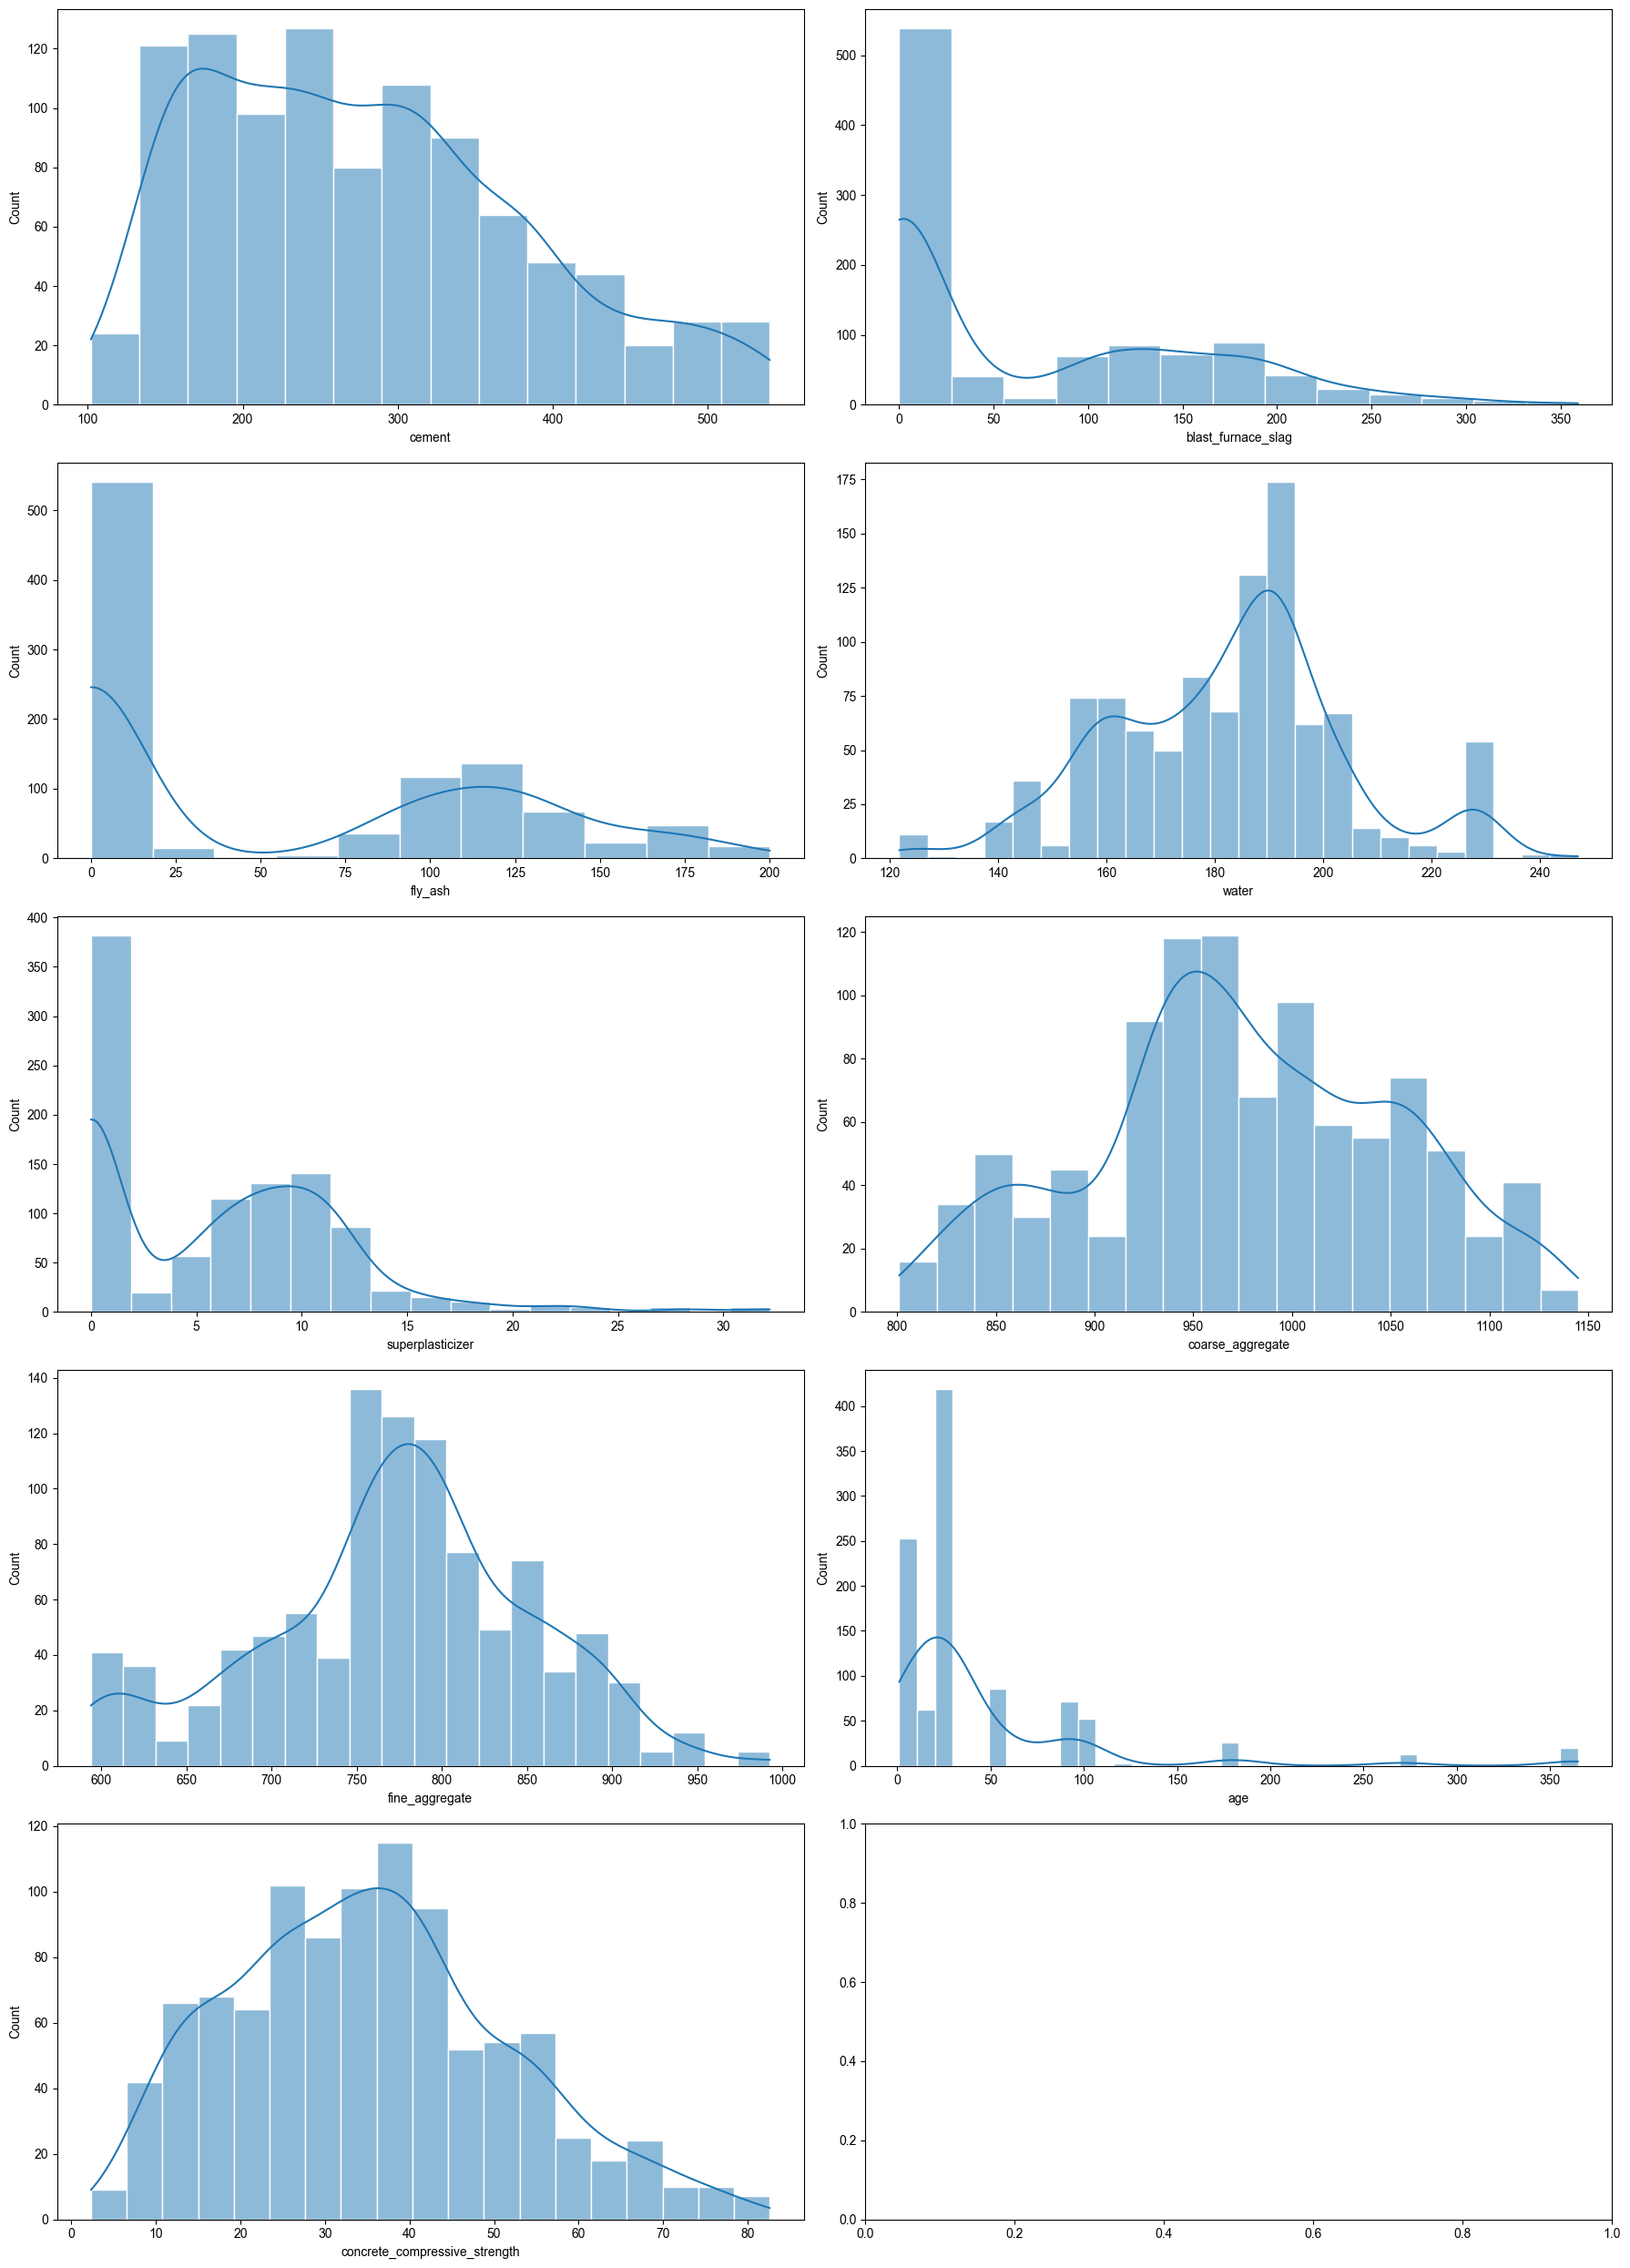

In [15]:
n_columns = len(df.columns)
n_rows = (n_columns + 1) // 2  
fig, ax = plt.subplots(n_rows, 2, figsize=(18, 5 * n_rows))  

ax = ax.flatten()
sns.set_style('darkgrid')
for i in range(n_columns):
    sns.histplot(df[df.columns[i]], ax=ax[i],kde=True) 

plt.tight_layout() 

## there are some skewnes in columns:
* blast_furnace_slag - Right skewed data 
* fly_ash - Right skewed
* age - right skewed 
* superplasticizer - a lit bit right skewed 

In [16]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

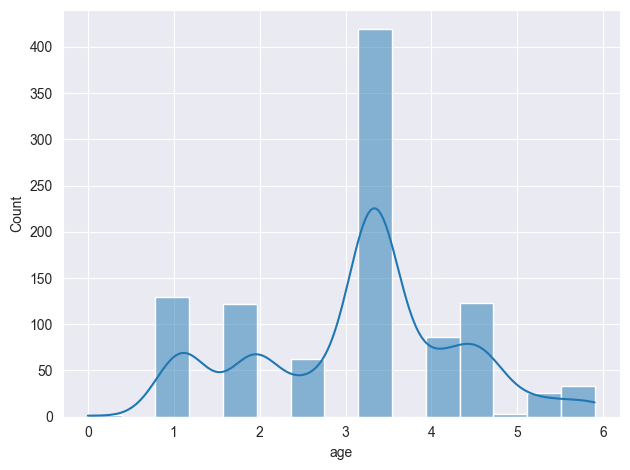

In [17]:
# plt.figure(figsize=(18,6))
# plt.subplot(121)
# sns.histplot(df,x='cement',kde=True,bins=30)
# plt.grid(True)
# plt.subplot(122)
sns.histplot(x=np.log(df['age']),kde=True)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: ylabel='fly_ash'>

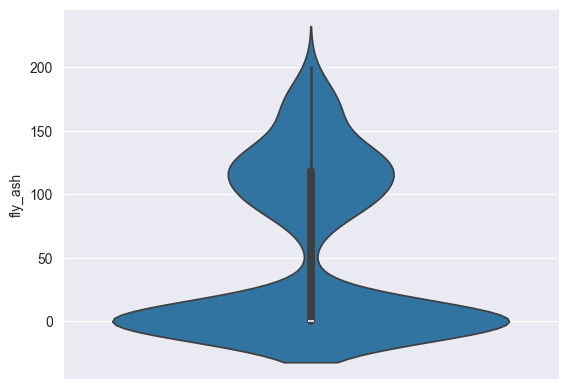

In [18]:
sns.violinplot(df,y='fly_ash')

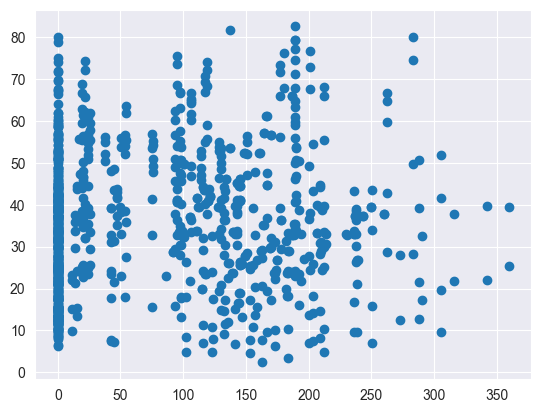

In [19]:
plt.scatter(df['blast_furnace_slag'],df['concrete_compressive_strength'])

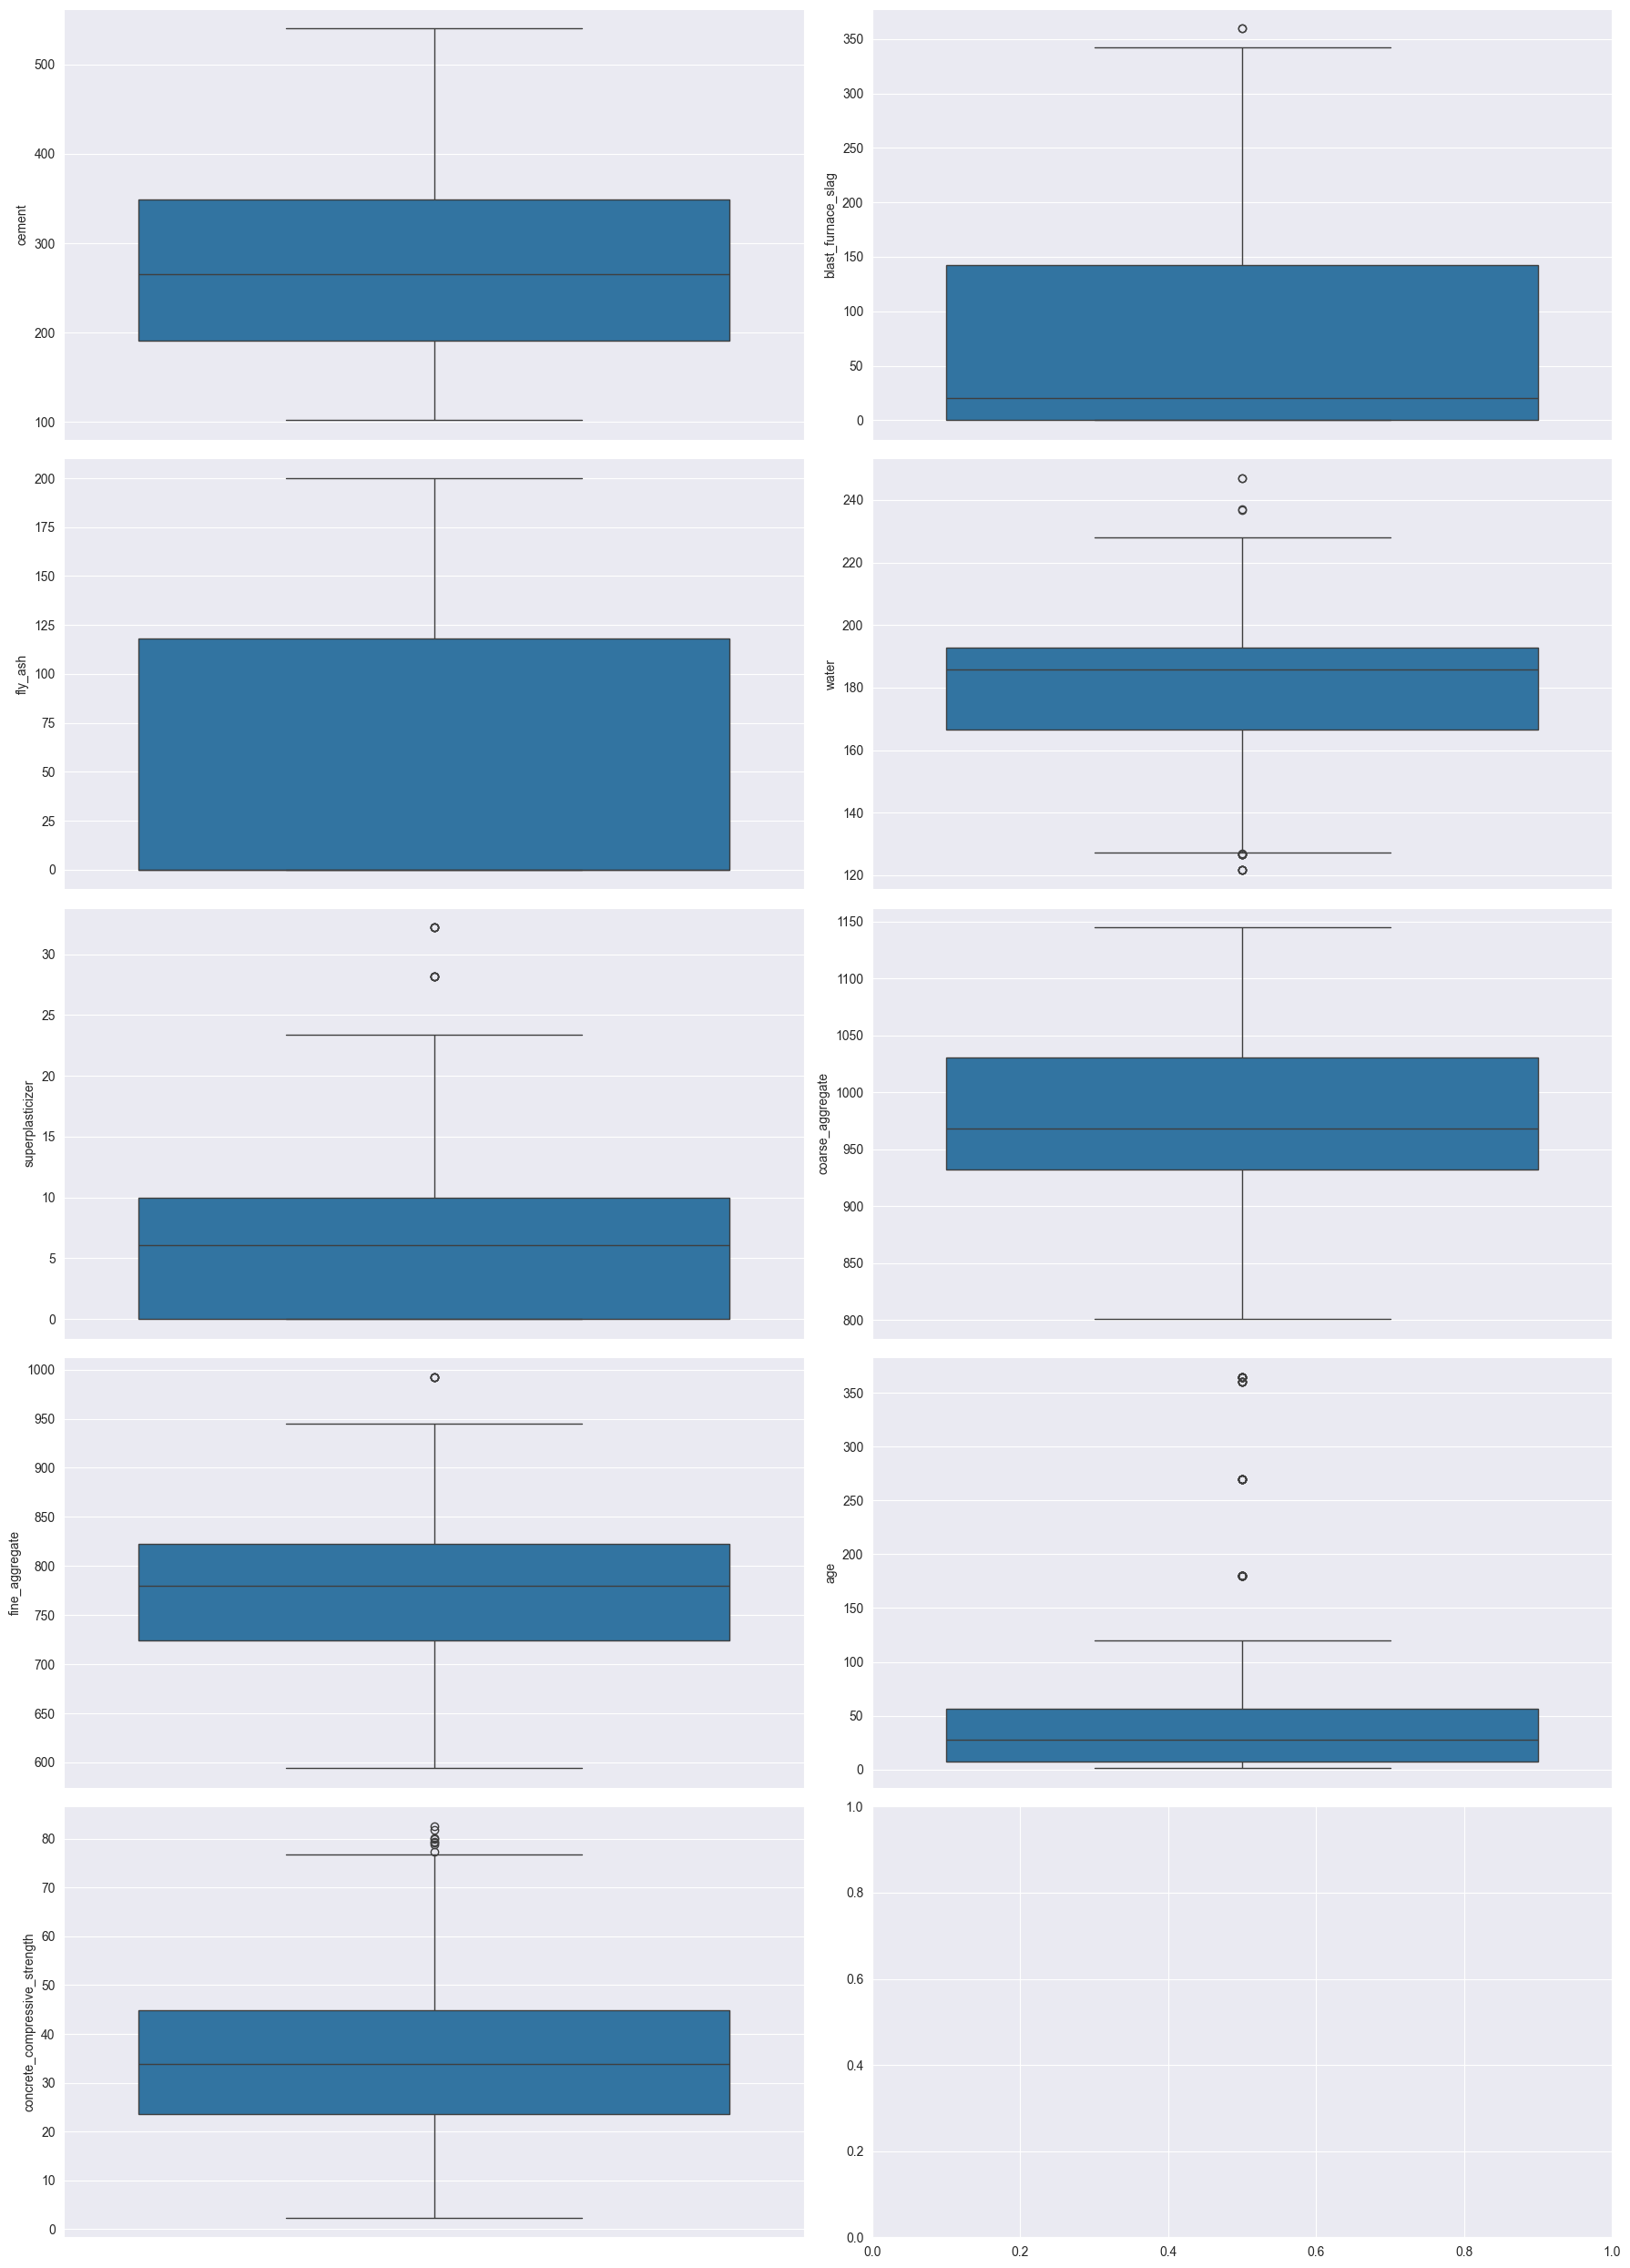

In [20]:
n_columns = len(df.columns)
n_rows = (n_columns + 1) // 2  
fig, ax = plt.subplots(n_rows, 2, figsize=(18, 5 * n_rows))  

ax = ax.flatten()
sns.set_style('darkgrid')
for i in range(n_columns):
    sns.boxplot(df[df.columns[i]], ax=ax[i]) 

plt.tight_layout() 

In [21]:
df.duplicated().sum()

0

In [23]:
df.shape

(1005, 9)